In [1]:
import netdag
import network_statistics
from IPython.display import Image
from numpy.random import random
from numpy.linalg import norm
from numpy import array, linspace, zeros
from itertools import combinations
from graph_tool import Graph
from graph_tool.topology import label_components, pseudo_diameter as diameter
import matplotlib.pyplot as plt
from tqdm import tqdm

models = {}

100%|██████████| 20/20 [00:21<00:00,  2.06it/s]


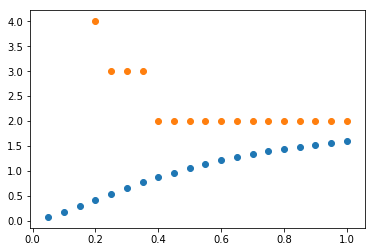

In [2]:
# |P|
N_nodes = 30
# number of random configurations of P to "benchmark"
N_samples = 50
# number of power settings
N_power_settings = 20

Q = -1 * linspace(-1, 0, N_power_settings+1)[:-1]
fSS = zeros(N_power_settings)
D_N = zeros(N_power_settings)
placements = random(size=(N_samples, N_nodes, 3))
R = array([[norm(x - y) for x, y in combinations(placement, 2)] for placement in placements])
for i, Q_i in tqdm(list(enumerate(Q))):
    SS_i = Q_i/(R**2)
    SS_i[SS_i > 2] = 2
    SS_i[SS_i < 0.5] = 0
    N_i = [Graph(directed=False) for _ in range(N_samples)]
    _ = [N_i_j.add_vertex(n=N_nodes) for N_i_j in N_i]
    _ = [N_i[j].add_edge(x, y)
     for j in range(N_samples)
     for k, (x, y) in enumerate(combinations(range(N_nodes), 2))
     if SS_i[j][k] > 0]
    D_N[i] = (max([diameter(N_i_j)[0] for N_i_j in N_i])
              if all([len(label_components(N_i_j)[1])==1 for N_i_j in N_i])
              else float('inf'))
    fSS[i] = SS_i.mean(axis=1).min()
plt.scatter(Q, fSS)
plt.scatter(Q, D_N)

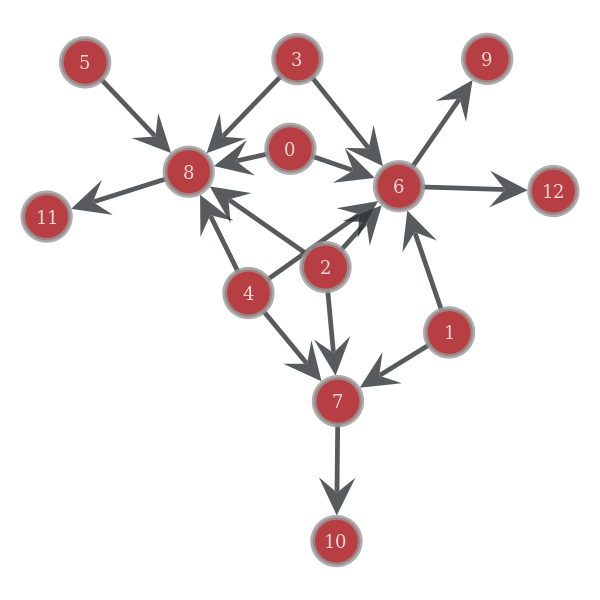

In [3]:
Image(filename='control-application.xml.gz_task-graph.png')

In [4]:
g = netdag.load_graph('control-application.xml.gz')
makespan = zeros(N_power_settings)
assert(netdag.is_DAG(g))
for i, Q_i in tqdm(list(enumerate(Q))):
    if i in models:
        print('found model for', i, '(skipping)')
        continue
    if D_N[i] == float('inf'):
        makespan[i] = float('inf')
        continue
    network = {'A': 1, 'B': D_N[i]-1, 'C': 1, 'D': 1, 'GAMMA': 1,
               'LAMBDA': network_statistics.get_lambda_soft_from_mean_signal_strength(fSS[i])}
    model = netdag.get_makespan_optimal_soft_schedule(g, network)
    zeta, chi, duration, label = model
    models[i] = model
    makespan[i] = max(zeta) if zeta is not None else float('inf')

  0%|          | 0/20 [00:00<?, ?it/s]

*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Academic license - for non-commercial use only
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [1e-13, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bou

  1466  1140  169.26674   25  469  243.00000  120.55683  50.4%   439  520s
  1497  1143  208.47877   31  305  243.00000  120.55683  50.4%   434  525s
  1522  1151  208.70932   33  312  243.00000  120.55683  50.4%   429  533s
  1554  1154  208.78865   36  302  243.00000  120.55683  50.4%   424  556s
  1599  1156  234.13514   47  205  243.00000  121.05235  50.2%   420  563s
  1623  1154  127.78717   19  484  243.00000  121.05235  50.2%   421  566s
  1656  1174  128.19903   20  474  243.00000  121.05235  50.2%   417  581s
  1664  1172  156.29134   22  460  243.00000  121.05235  50.2%   418  586s
  1690  1184  167.00065   26  493  243.00000  121.05235  50.2%   417  591s
  1732  1195  229.03436   31  431  243.00000  122.06670  49.8%   413  596s
  1802  1220  138.44598   19  476  243.00000  122.06670  49.8%   404  602s
  1860  1227  146.49737   21  485  243.00000  122.06670  49.8%   398  607s
  1896  1229  164.07433   27  475  243.00000  122.06670  49.8%   399  613s
  1974  1268  185.65372  

 39332 19069     cutoff   29       243.00000  215.82736  11.2%   215 1828s
 39658 19101  231.80205   36  374  243.00000  216.11293  11.1%   215 1837s
 39978 19120  237.37755   37  432  243.00000  216.36737  11.0%   215 1845s
 40293 19141  222.41148   32  458  243.00000  216.65750  10.8%   214 1852s
 40623 19181  236.75000   25  291  243.00000  216.93109  10.7%   214 1861s
 40945 19188     cutoff   29       243.00000  217.20000  10.6%   214 1866s
 41251 19191  241.73800   33  408  243.00000  217.44946  10.5%   214 1873s
 41537 19159  235.90144   30  374  243.00000  217.77263  10.4%   213 1879s
 41898 19214     cutoff   36       243.00000  218.02360  10.3%   213 1888s
 42204 19221  235.26537   29  420  243.00000  218.22517  10.2%   213 1896s
 42506 19218  239.13107   37  322  243.00000  218.49362  10.1%   213 1906s
 42814 19215     cutoff   36       243.00000  218.71016  10.0%   213 1913s
 43122 19216  230.37280   39  265  243.00000  218.94440  9.90%   213 1918s
 43445 19234  240.90008  

 69480 10608     cutoff   36       243.00000  235.95495  2.90%   183 2476s
 69676 10518 infeasible   29       243.00000  236.02295  2.87%   183 2480s
 70392 10130 infeasible   30       243.00000  236.32587  2.75%   182 2485s
 70725  9927     cutoff   35       243.00000  236.47158  2.69%   182 2490s
 71203  9606     cutoff   34       243.00000  236.68963  2.60%   181 2495s
 71551  9407     cutoff   32       243.00000  236.84043  2.53%   180 2501s
 71891  9200  237.21532   32  477  243.00000  236.98077  2.48%   180 2506s
 72356  9096     cutoff   29       243.00000  237.08639  2.43%   179 2530s
 73008  8653     cutoff   37       243.00000  237.35751  2.32%   178 2535s
 73341  8440  238.37339   30  406  243.00000  237.49185  2.27%   178 2540s
 73952  7990  239.70393   33  361  243.00000  237.76860  2.15%   177 2545s
 74409  7648 infeasible   35       243.00000  237.98687  2.06%   176 2550s
 75130  7262 infeasible   36       243.00000  238.20352  1.97%   175 2555s
 75852  6673     cutoff  

  5%|▌         | 1/20 [49:02<15:31:52, 2942.77s/it]


*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [3e-13, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range      

  1310  1109  197.65886   19  484  251.00000  106.52706  57.6%   406  303s
  1311  1109  221.84710   20  484  251.00000  106.52706  57.6%   406  305s
  1312  1112  106.52706   14  513  251.00000  106.52706  57.6%  31.0  354s
  1314  1114  106.52706   15  535  251.00000  106.52706  57.6%  34.9  373s
  1317  1115  106.52706   16  555  251.00000  106.52706  57.6%  41.8  391s
  1323  1116  106.52706   17  575  251.00000  106.52706  57.6%  56.1  406s
  1329  1118  106.52706   18  600  251.00000  106.52706  57.6%  62.9  417s
  1335  1121  106.52706   19  497  251.00000  106.52706  57.6%  67.8  423s
  1341  1120  110.88172   19  476  251.00000  106.52706  57.6%  72.3  436s
  1347  1122  106.52706   20  489  251.00000  106.52706  57.6%  77.0  452s
  1355  1125  113.11708   21  636  251.00000  106.52706  57.6%  89.3  464s
  1365  1122  106.52706   22  521  251.00000  106.52706  57.6%  96.0  478s
  1375  1130  106.52706   23  437  251.00000  106.52706  57.6%   107  487s
  1386  1134  106.52706  

 28773 19029  226.00000   46  233  247.00000  167.53053  32.2%   497 2606s
 29475 19502  185.86562   47  515  247.00000  168.15660  31.9%   497 2644s
 29884 19736  225.11954   55  376  247.00000  168.59648  31.7%   496 2680s
 30632 20237 infeasible   61       247.00000  168.84026  31.6%   496 2716s
 31310 20737  202.83169   41  590  247.00000  169.52326  31.4%   496 2751s
 31749 21001  204.98225   41  346  247.00000  169.74026  31.3%   495 2788s
 32510 21526  199.00000   51  536  247.00000  170.00000  31.2%   494 2827s
 33058 21845  210.00000   46  463  247.00000  170.50534  31.0%   494 2868s
 33754 22264  177.45221   45  527  247.00000  171.00000  30.8%   493 2906s
 34529 22833  243.32484   63  319  247.00000  171.25724  30.7%   491 2948s
 34930 22978  207.00000   57  378  247.00000  171.69737  30.5%   489 2981s
 35544 23403  208.98744   43  568  247.00000  172.00000  30.4%   489 3019s
 36278 23887  229.54818   37  320  247.00000  172.58996  30.1%   487 3061s
 36961 24354  237.68973  

 99703 60755  213.53849   55  260  247.00000  195.95560  20.7%   422 6059s
 100282 61015  241.27223   48  360  247.00000  196.00000  20.6%   422 6082s
 100966 61349  234.60444   46  369  247.00000  196.00000  20.6%   421 6104s
 101583 61666  226.01104   37  533  247.00000  196.38505  20.5%   421 6139s
 102204 62003  210.94936   32  528  247.00000  196.54211  20.4%   420 6160s
 102575 62122  234.88261   39  342  247.00000  196.70546  20.4%   419 6182s
 103260 62455  218.27852   32  442  247.00000  197.00000  20.2%   419 6206s
 103815 62659  220.65476   47  596  247.00000  197.00000  20.2%   419 6228s
 104443 62974  237.27430   42  300  247.00000  197.00000  20.2%   419 6250s
 104912 63179  228.07254   30  239  247.00000  197.24254  20.1%   418 6273s
 105511 63460  234.75000   37  257  247.00000  197.41236  20.1%   417 6296s
 106150 63859  221.96525   39  559  247.00000  197.72416  19.9%   416 6324s
 106361 63899  225.31579   35  285  247.00000  197.81579  19.9%   416 6347s
 106946 64172

 151632 80086 infeasible   43       247.00000  207.92822  15.8%   383 8079s
 152051 80195  219.00718   57  300  247.00000  208.00000  15.8%   383 8090s
 152426 80264     cutoff   44       247.00000  208.00000  15.8%   383 8112s
 152799 80331  218.65388   49  412  247.00000  208.00000  15.8%   383 8125s
 153223 80460  218.56261   34  418  247.00000  208.08849  15.8%   383 8137s
 153635 80555  230.25655   43  224  247.00000  208.19079  15.7%   383 8148s
 154025 80644  230.15255   42  296  247.00000  208.30556  15.7%   382 8161s
 154420 80746  233.75000   51  334  247.00000  208.38462  15.6%   382 8177s
 154838 80858 infeasible   42       247.00000  208.49790  15.6%   382 8188s
 155222 80932  233.90000   35  401  247.00000  208.62500  15.5%   381 8203s
 155676 81068  234.25655   40  252  247.00000  208.75497  15.5%   381 8218s
 156077 81165  219.26629   49  296  247.00000  208.88841  15.4%   380 8234s
 156539 81311  220.83927   47  363  247.00000  209.00000  15.4%   380 8244s
 156923 8138

 192033 87176 infeasible   43       247.00000  216.46667  12.4%   362 9505s
 192335 87179  229.43317   33  449  247.00000  216.55349  12.3%   362 9512s
 192630 87194 infeasible   49       247.00000  216.63290  12.3%   362 9538s
 192902 87173 infeasible   40       247.00000  216.65340  12.3%   362 9545s
 193206 87190 infeasible   39       247.00000  216.78472  12.2%   361 9555s
 193517 87221  225.78842   49  370  247.00000  216.86584  12.2%   361 9569s
 193866 87234  243.60660   32  300  247.00000  216.94098  12.2%   361 9582s
 194241 87310  245.08481   32  267  247.00000  217.00000  12.1%   361 9593s
 194567 87349 infeasible   55       247.00000  217.00000  12.1%   361 9601s
 194870 87370  230.25656   33  252  247.00000  217.00000  12.1%   361 9612s
 195207 87415  232.98289   52  204  247.00000  217.00000  12.1%   361 9626s
 195617 87516 infeasible   50       247.00000  217.00000  12.1%   361 9639s
 195999 87591 infeasible   51       247.00000  217.00000  12.1%   361 9648s
 196325 8760

 222752 86357  236.46737   34  313  247.00000  221.41975  10.4%   348 10453s
 223008 86334     cutoff   46       247.00000  221.48232  10.3%   348 10468s
 223200 86261  244.51078   49  323  247.00000  221.52354  10.3%   348 10475s
 223467 86219  229.97504   52  312  247.00000  221.60000  10.3%   348 10481s
 223705 86165  238.10347   40  376  247.00000  221.67505  10.3%   348 10485s
 223932 86107  223.57380   45  568  247.00000  221.74046  10.2%   348 10493s
 224224 86095     cutoff   44       247.00000  221.80592  10.2%   347 10500s
 224472 86064     cutoff   42       247.00000  221.86454  10.2%   347 10513s
 224784 86045 infeasible   30       247.00000  221.93176  10.1%   347 10521s
 225051 86002  234.90462   39  406  247.00000  221.98822  10.1%   347 10530s
 225324 85982 infeasible   50       247.00000  222.00000  10.1%   347 10537s
 225573 85949  237.25675   45  293  247.00000  222.00000  10.1%   347 10544s
 225807 85905  237.18619   40  439  247.00000  222.00000  10.1%   347 10551s

 249489 81802  234.58333   57  397  247.00000  226.81064  8.17%   337 11293s
 249716 81755     cutoff   38       247.00000  226.88424  8.14%   337 11301s
 249978 81697 infeasible   64       247.00000  226.94624  8.12%   337 11307s
 250242 81673  226.97595   51  433  247.00000  226.97595  8.11%   337 11314s
 250451 81593     cutoff   62       247.00000  227.00000  8.10%   337 11321s
 250693 81538     cutoff   48       247.00000  227.00000  8.10%   337 11330s
 250957 81470  231.22881   64  541  247.00000  227.00000  8.10%   337 11343s
 251204 81423  241.48596   53  414  247.00000  227.03926  8.08%   337 11348s
 251429 81370  245.96000   42  205  247.00000  227.12077  8.05%   337 11352s
 251640 81299  243.22355   42  364  247.00000  227.18045  8.02%   337 11355s
 251846 81229  239.03083   50  371  247.00000  227.22885  8.00%   337 11360s
 252080 81186     cutoff   46       247.00000  227.28830  7.98%   337 11365s
 252294 81124  228.83071   49  296  247.00000  227.33694  7.96%   336 11371s

 275166 73145  238.39011   35  297  247.00000  230.85563  6.54%   325 11956s
 275550 72963 infeasible   32       247.00000  230.92105  6.51%   325 11964s
 275759 72889     cutoff   50       247.00000  230.94748  6.50%   325 11967s
 275966 72821     cutoff   48       247.00000  230.98926  6.48%   325 11974s
 276257 72805 infeasible   45       247.00000  231.00000  6.48%   325 11978s
 276424 72707 infeasible   33       247.00000  231.00000  6.48%   325 11982s
 276606 72615 infeasible   58       247.00000  231.00000  6.48%   325 11988s
 276812 72544 infeasible   59       247.00000  231.00000  6.48%   325 11994s
 277021 72476 infeasible   54       247.00000  231.00000  6.48%   325 12002s
 277253 72416 infeasible   51       247.00000  231.00000  6.48%   325 12010s
 277495 72359 infeasible   55       247.00000  231.00000  6.48%   325 12016s
 277701 72276  244.87517   46  343  247.00000  231.00000  6.48%   326 12023s
 277918 72202 infeasible   55       247.00000  231.00000  6.48%   326 12029s

 305611 58693     cutoff   44       247.00000  234.93296  4.89%   311 12580s
 305985 58500     cutoff   47       247.00000  234.99507  4.86%   311 12591s
 306289 58466  237.23421   39  229  247.00000  235.00000  4.86%   311 12599s
 306566 58430 infeasible   52       247.00000  235.00000  4.86%   311 12607s
 306836 58379 infeasible   64       247.00000  235.00000  4.86%   311 12613s
 307121 58333 infeasible   59       247.00000  235.00000  4.86%   311 12621s
 307401 58305 infeasible   48       247.00000  235.00000  4.86%   310 12628s
 307674 58287 infeasible   48       247.00000  235.00000  4.86%   310 12658s
 307848 58202     cutoff   57       247.00000  235.00000  4.86%   310 12664s
 308081 58129 infeasible   45       247.00000  235.00000  4.86%   310 12669s
 308305 58043     cutoff   65       247.00000  235.02538  4.85%   310 12672s
 308488 57942     cutoff   40       247.00000  235.05727  4.84%   310 12675s
 308837 57736 infeasible   47       247.00000  235.12700  4.81%   310 12680s

 345439 33308  244.20979   38  285  247.00000  240.63761  2.58%   289 13185s
 345997 32836 infeasible   32       247.00000  240.75113  2.53%   289 13190s
 346420 32476     cutoff   60       247.00000  240.87172  2.48%   289 13195s
 346888 32135 infeasible   50       247.00000  240.96121  2.44%   289 13200s
 347263 31950     cutoff   52       247.00000  241.00000  2.43%   288 13205s
 347642 31755 infeasible   42       247.00000  241.00000  2.43%   288 13210s
 347992 31558 infeasible   58       247.00000  241.00000  2.43%   288 13215s
 348479 31221     cutoff   51       247.00000  241.09809  2.39%   288 13220s
 348917 30899     cutoff   51       247.00000  241.19205  2.35%   287 13230s
 349338 30550 infeasible   42       247.00000  241.27181  2.32%   287 13235s
 349912 30091     cutoff   55       247.00000  241.38505  2.27%   287 13240s
 350482 29616     cutoff   61       247.00000  241.47488  2.24%   286 13245s
 351188 29025     cutoff   54       247.00000  241.60714  2.18%   286 13250s

 10%|█         | 2/20 [4:39:34<31:02:52, 6209.60s/it]


*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [5e-13, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range      

     3     8   90.78130    2  538  247.00000   87.10804  64.7%  1816  177s
     7    14  103.41259    3  431  247.00000   90.79048  63.2%  1659  180s
    19    24  122.33570    5  565  247.00000   98.40874  60.2%  1576  186s
    53    57  188.47255    9  865  247.00000   98.40874  60.2%  1070  190s
   169   151  146.73867   11  583  247.00000  103.45306  58.1%   581  195s
   286   245  232.45938   11  488  247.00000  123.65760  49.9%   522  200s
   409   347  147.09868    7  602  247.00000  127.15471  48.5%   474  205s
   541   460  148.09652    9  670  247.00000  130.90235  47.0%   449  210s
   686   583  229.01670   15  657  247.00000  132.36957  46.4%   453  215s
   830   690     cutoff   18       247.00000  144.58301  41.5%   455  248s
   886   725  196.84940   10  636  247.00000  148.14221  40.0%   455  251s
  1049   847  200.21362   15  609  247.00000  150.91485  38.9%   446  255s
  1225   984  217.57839   19  876  247.00000  154.56403  37.4%   437  260s
  1276  1029  172.08072  

 10557   940  244.82347   48   66  247.00000  244.00000  1.21%   255 1260s
 10711   827     cutoff   41       247.00000  244.20298  1.13%   257 1269s
 10856   707 infeasible   29       247.00000  244.51202  1.01%   255 1270s
 11208   492 infeasible   44       247.00000  245.00000  0.81%   250 1284s
 11448   405  245.94010   51  128  247.00000  245.00000  0.81%   254 1291s
 11832    28     cutoff   39       247.00000  245.94291  0.43%   247 1298s
 11975     0 infeasible   38       247.00000  246.00000  0.40%   249 1302s

Cutting planes:
  Gomory: 2
  Cover: 40
  Implied bound: 1153
  Projected implied bound: 1
  Clique: 45
  MIR: 41
  StrongCG: 3
  Flow cover: 256
  GUB cover: 1
  Zero half: 75

Explored 12003 nodes (3650854 simplex iterations) in 1302.35 seconds
Thread count was 12 (of 12 available processors)

Solution count 5: 247 251 261 ... 356

Optimal solution found (tolerance 1.00e-04)
Best objective 2.470000000000e+02, best bound 2.470000000000e+02, gap 0.0000%


 15%|█▌        | 3/20 [5:06:42<22:49:52, 4834.84s/it]

	solver returned optimal!
*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [1e-12, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00,

  1298  1107  111.44898   16  449  251.00000  111.44898  55.6%  51.0  361s
  1304  1109  115.66586   16  367  251.00000  111.44898  55.6%  54.7  370s
  1310  1114  111.44898   17  540  251.00000  111.44898  55.6%  58.4  378s
  1318  1111 infeasible   17       251.00000  111.44898  55.6%  62.3  387s
  1328  1108  111.44898   18  465  251.00000  111.44898  55.6%  72.3  397s
  1336  1118  111.44898   19  485  251.00000  111.44898  55.6%  82.2  410s
  1345  1127  111.44898   20  537  251.00000  111.44898  55.6%  96.4  417s
  1357  1122  119.41982   20  423  251.00000  111.44898  55.6%   105  444s
  1363  1132  111.44898   21  369  251.00000  111.44898  55.6%   110  451s
  1375  1137  120.03760   21  393  251.00000  111.44898  55.6%   115  457s
  1391  1138  111.44898   22  359  251.00000  111.44898  55.6%   122  468s
  1409  1143  119.98681   23  393  251.00000  111.44898  55.6%   129  474s
  1432  1148  123.25269   24  369  251.00000  111.44898  55.6%   135  479s
  1457  1153  128.25644  

 38631 22089  233.85837   23  464  251.00000  216.94771  13.6%   321 1710s
 39101 22266  242.01631   30  454  251.00000  217.30764  13.4%   321 1721s
 39513 22381  225.72344   22  490  251.00000  217.71220  13.3%   322 1736s
 39996 22572  244.25576   28  445  251.00000  218.00000  13.1%   321 1746s
 40548 22816  248.87414   40  393  251.00000  218.54265  12.9%   321 1753s
 41017 22995  237.58811   40  413  251.00000  218.92484  12.8%   320 1764s
 41530 23202  231.73559   32  358  251.00000  219.19946  12.7%   320 1770s
 41919 23290  248.38393   36  482  251.00000  219.53291  12.5%   319 1779s
 42411 23478     cutoff   32       251.00000  219.87493  12.4%   319 1791s
 42859 23751  245.75308   35  485  251.00000  220.17102  12.3%   318 1817s
 42871 23640  245.88185   36  363  251.00000  220.17496  12.3%   318 1835s
 43262 23749 infeasible   46       251.00000  220.39059  12.2%   318 1843s
 43702 23907 infeasible   34       251.00000  220.71607  12.1%   318 1850s
 44139 24042 infeasible  

 75173 25671 infeasible   38       251.00000  236.85145  5.64%   290 2626s
 75532 25499  245.62250   42  543  251.00000  236.97826  5.59%   290 2634s
 75826 25488 infeasible   52       251.00000  237.00000  5.58%   290 2640s
 76260 25353  246.54198   27  557  251.00000  237.13707  5.52%   289 2650s
 76663 25206  241.22397   28  459  251.00000  237.27304  5.47%   289 2660s
 76866 25129 infeasible   33       251.00000  237.35572  5.44%   289 2665s
 77054 25038     cutoff   40       251.00000  237.43433  5.40%   288 2671s
 77281 24977 infeasible   41       251.00000  237.50251  5.38%   288 2675s
 77909 24748 infeasible   34       251.00000  237.68186  5.31%   287 2684s
 78117 24673 infeasible   30       251.00000  237.74237  5.28%   287 2689s
 78384 24628 infeasible   40       251.00000  237.80722  5.26%   287 2693s
 78636 24598     cutoff   40       251.00000  237.87175  5.23%   286 2700s
 79098 24485  243.82957   44  366  251.00000  238.00000  5.18%   286 2710s
 79546 24346 infeasible  

 103622 12857 infeasible   35       251.00000  245.35293  2.25%   262 3305s
 103948 12645 infeasible   38       251.00000  245.48229  2.20%   262 3312s
 104109 12538  246.87415   34  543  251.00000  245.54491  2.17%   262 3315s
 104474 12330 infeasible   26       251.00000  245.69606  2.11%   261 3323s
 104658 12230     cutoff   41       251.00000  245.75932  2.09%   261 3326s
 105022 12049     cutoff   32       251.00000  245.86710  2.04%   261 3333s
 105215 11960  247.38872   35  455  251.00000  245.92417  2.02%   261 3336s
 105596 11761 infeasible   57       251.00000  246.00000  1.99%   260 3341s
 105742 11638 infeasible   36       251.00000  246.00000  1.99%   260 3346s
 106035 11402     cutoff   40       251.00000  246.00928  1.99%   260 3352s
 106202 11296  247.51551   33  457  251.00000  246.06121  1.97%   260 3356s
 106536 11090  246.88837   34  588  251.00000  246.16675  1.93%   260 3361s
 106676 10972  247.76561   38  463  251.00000  246.21911  1.90%   260 3365s
 107022 1076

 20%|██        | 4/20 [6:12:06<20:16:28, 4561.79s/it]


*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [3e-12, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range      

H 1316  1056                     255.0000000   97.14048  61.9%   570  440s
  1317  1057  253.28205   23  524  255.00000   97.14048  61.9%   570  454s
  1318  1058  164.48441   17  476  255.00000   97.14048  61.9%   569  465s
  1319  1058  121.54792   12  476  255.00000   97.14048  61.9%   569  471s
  1320  1061   97.14048   16  568  255.00000   97.14048  61.9%   637  521s
  1322  1062   97.14048   17  518  255.00000   97.14048  61.9%   643  570s
  1325  1066   97.14048   18  471  255.00000   97.14048  61.9%   647  589s
  1330  1071   97.14048   19  409  255.00000   97.14048  61.9%   657  603s
  1336  1075  120.18165   20  629  255.00000   97.14048  61.9%   661  624s
  1342  1074   99.58705   20  473  255.00000   99.58705  60.9%   664  630s
  1348  1082  100.00000   21  445  255.00000   99.58705  60.9%   666  641s
  1354  1077 infeasible   21       255.00000  100.00000  60.8%   668  647s
  1363  1081  135.44217   22  550  255.00000  100.34793  60.6%   678  655s
  1373  1080  106.00000  

 28496 14803  227.24753   50  540  255.00000  199.95077  21.6%   628 3203s
 29206 15188  236.17697   50  335  255.00000  200.00000  21.6%   628 3250s
 29878 15528  247.51811   53  365  255.00000  201.00000  21.2%   627 3301s
 30630 15823  228.90084   48  412  255.00000  201.56872  21.0%   622 3347s
 31425 16199  239.90967   53  292  255.00000  202.16966  20.7%   618 3391s
 32068 16465  216.06727   40  281  255.00000  203.00000  20.4%   616 3431s
 32804 16829  240.08411   42  404  255.00000  203.00000  20.4%   612 3471s
 33491 17131  242.54525   37  389  255.00000  204.00000  20.0%   611 3508s
 34132 17421 infeasible   29       255.00000  204.79094  19.7%   607 3544s
 34803 17735     cutoff   35       255.00000  205.00000  19.6%   607 3579s
 35395 17988  236.02874   52  286  255.00000  206.00000  19.2%   603 3618s
 36031 18251  226.92446   28  538  255.00000  206.22875  19.1%   602 3658s
 36666 18528  225.96641   34  463  255.00000  207.00000  18.8%   601 3689s
 37246 18771 infeasible  

 76738 27355  235.09683   56  407  255.00000  231.00000  9.41%   505 5679s
 77073 27358  238.16738   50  402  255.00000  231.00000  9.41%   505 5694s
 77405 27368  253.50734   36  387  255.00000  231.03447  9.40%   505 5703s
 77655 27397  253.26514   33  361  255.00000  231.23987  9.32%   504 5722s
 77792 27321  248.43215   52  315  255.00000  231.28199  9.30%   503 5727s
 78009 27258 infeasible   33       255.00000  231.51718  9.21%   503 5735s
 78224 27187  250.87348   35  442  255.00000  231.70748  9.13%   502 5743s
 78493 27177  252.46688   39  313  255.00000  231.89984  9.06%   501 5752s
 78748 27136  244.66529   53  364  255.00000  232.00000  9.02%   501 5761s
 79031 27106  242.31453   48  294  255.00000  232.00000  9.02%   501 5773s
 79303 27088  245.46309   46  286  255.00000  232.07563  8.99%   500 5784s
 79538 27047  252.02042   37  381  255.00000  232.26249  8.92%   500 5792s
 79793 27019  252.69001   28  414  255.00000  232.41178  8.86%   499 5799s
 80039 26991  250.18556  

 103282 17860     cutoff   40       255.00000  243.37056  4.56%   446 6517s
 103560 17617 infeasible   34       255.00000  243.51882  4.50%   445 6522s
 103842 17380     cutoff   28       255.00000  243.68519  4.44%   444 6527s
 104139 17140  250.06667   43  285  255.00000  243.85688  4.37%   443 6532s
 104313 17042     cutoff   38       255.00000  243.92857  4.34%   443 6535s
 104481 16943  244.07469   36  289  255.00000  244.00000  4.31%   442 6542s
 104689 16862 infeasible   52       255.00000  244.00000  4.31%   442 6551s
 105045 16665     cutoff   35       255.00000  244.06800  4.29%   442 6555s
 105384 16463     cutoff   38       255.00000  244.20905  4.23%   441 6561s
 105675 16231 infeasible   44       255.00000  244.34094  4.18%   440 6569s
 105826 16112 infeasible   49       255.00000  244.40904  4.15%   439 6570s
 106235 15758     cutoff   40       255.00000  244.62672  4.07%   438 6577s
 106518 15527     cutoff   40       255.00000  244.77685  4.01%   437 6581s
 106817 1529

 25%|██▌       | 5/20 [8:11:10<22:14:03, 5336.26s/it]

	solver returned optimal!
*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [7e-12, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00,

     0     0   96.15677    0  782  261.00000   96.15677  63.2%     -  162s
     0     0   96.18018    0  852  261.00000   96.18018  63.1%     -  162s
     0     0   96.18177    0  843  261.00000   96.18177  63.1%     -  163s
     0     0   96.23643    0  679  261.00000   96.23643  63.1%     -  166s
     0     0   96.23951    0  763  261.00000   96.23951  63.1%     -  187s
     0     0   96.28342    0  792  261.00000   96.28342  63.1%     -  192s
     0     0   96.31592    0  755  261.00000   96.31592  63.1%     -  193s
     0     0   96.31592    0  737  261.00000   96.31592  63.1%     -  193s
     0     0   96.35894    0  712  261.00000   96.35894  63.1%     -  197s
     0     0   96.35894    0  577  261.00000   96.35894  63.1%     -  198s
     0     2   96.35894    0  561  261.00000   96.35894  63.1%     -  200s
     3     8   96.62415    2  594  261.00000   96.35894  63.1%  1372  205s
    25    29  111.28563    5  996  261.00000   96.62415  63.0%  1058  210s
    31    31  113.34652  

  7691  2286     cutoff   26       261.00000  241.78817  7.36%   370 1604s
  7953  2268  259.29231   40  507  261.00000  243.15863  6.84%   369 1631s
  8166  2286 infeasible   45       261.00000  243.92635  6.54%   368 1660s
  8258  2188 infeasible   23       261.00000  244.35714  6.38%   368 1690s
  8481  2156  257.15984   42  318  261.00000  245.55721  5.92%   367 1717s
  8761  2143  256.09735   35  394  261.00000  246.00000  5.75%   368 1725s
  9043  2118  254.19957   51  391  261.00000  247.00000  5.36%   366 1743s
  9337  2091 infeasible   46       261.00000  248.26289  4.88%   366 1759s
  9618  2061  255.39160   56  419  261.00000  249.00276  4.60%   366 1784s
  9894  2027 infeasible   43       261.00000  250.00000  4.21%   365 1791s
 10179  2013  258.76554   40  263  261.00000  250.00000  4.21%   363 1815s
 10524  1979 infeasible   33       261.00000  251.00000  3.83%   362 1850s
 10784  1940     cutoff   33       261.00000  252.00000  3.45%   362 1866s
 10993  1862 infeasible  

 30%|███       | 6/20 [8:50:33<17:17:01, 4444.39s/it]


*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [2e-11, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range      

  1353  1167  118.00000   15  468  265.00000  118.00000  55.5%  90.3  756s
  1355  1170  118.00000   16  465  265.00000  118.00000  55.5%  90.6  772s
  1359  1169  132.73211   17  581  265.00000  118.00000  55.5%  98.2  792s
  1365  1171  133.00000   18  579  265.00000  133.00000  49.8%   108  797s
  1371  1174  135.89911   19  522  265.00000  133.00000  49.8%   114  803s
  1377  1175  179.85262   19  585  265.00000  136.00000  48.7%   120  811s
  1383  1175  136.00000   20  514  265.00000  136.00000  48.7%   127  828s
  1392  1176  136.39744   21  507  265.00000  136.00000  48.7%   132  837s
  1400  1180  148.53882   21  481  265.00000  137.00000  48.3%   139  844s
  1410  1184  137.00000   22  504  265.00000  137.00000  48.3%   142  849s
  1424  1187  159.56014   23  595  265.00000  140.03227  47.2%   152  859s
  1435  1188  142.05490   24  518  265.00000  140.11512  47.1%   159  869s
  1449  1189  154.84954   24  534  265.00000  142.18237  46.3%   166  877s
  1464  1194  142.49451  

 30022 13693  259.47362   51  350  265.00000  244.68062  7.67%   321 2680s
 30509 13842 infeasible   63       265.00000  245.00000  7.55%   320 2690s
 30914 13943  248.58288   40  416  265.00000  245.32816  7.42%   319 2715s
 31216 13969     cutoff   39       265.00000  245.66731  7.30%   318 2725s
 31636 14092 infeasible   51       265.00000  246.00000  7.17%   317 2744s
 31997 14159     cutoff   43       265.00000  246.11632  7.13%   317 2772s
 32322 14206  250.04534   34  552  265.00000  246.43182  7.01%   316 2779s
 32699 14281     cutoff   46       265.00000  246.80915  6.86%   314 2789s
 33060 14344  263.63985   45  497  265.00000  247.00000  6.79%   314 2797s
 33402 14440     cutoff   48       265.00000  247.30659  6.68%   314 2834s
 33590 14393  262.30485   37  374  265.00000  247.51525  6.60%   313 2860s
 33912 14430  259.65364   42  285  265.00000  247.79572  6.49%   312 2881s
 34252 14453  259.71193   39  398  265.00000  248.00000  6.42%   312 2892s
 34584 14496  254.59258  

 59974  7874 infeasible   62       265.00000  261.00000  1.51%   257 3903s
 60151  7768  261.65855   67   41  265.00000  261.00000  1.51%   258 3922s
 60312  7656 infeasible   41       265.00000  261.00000  1.51%   260 3928s
 60452  7536 infeasible   43       265.00000  261.04386  1.49%   260 3931s
 60588  7413     cutoff   33       265.00000  261.10719  1.47%   259 3936s
 60740  7299 infeasible   31       265.00000  261.17778  1.44%   259 3940s
 61036  7059 infeasible   43       265.00000  261.32891  1.39%   258 3945s
 61166  6934     cutoff   38       265.00000  261.41165  1.35%   258 3950s
 61444  6691     cutoff   43       265.00000  261.55913  1.30%   257 3957s
 61741  6461 infeasible   31       265.00000  261.70390  1.24%   256 3966s
 61882  6341     cutoff   40       265.00000  261.76860  1.22%   256 3970s
 62018  6218     cutoff   33       265.00000  261.85138  1.19%   255 3976s
 62307  5984 infeasible   50       265.00000  262.00000  1.13%   254 3985s
 62689  5995     cutoff  

 35%|███▌      | 7/20 [10:06:23<16:09:48, 4476.05s/it]

	solver returned optimal!
*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [6e-11, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00,

     0     0   79.83892    0  597  275.00000   79.83892  71.0%     -  164s
     0     0   80.74445    0  598  275.00000   80.74445  70.6%     -  168s
     0     0   80.87992    0  623  275.00000   80.87992  70.6%     -  169s
     0     0   80.98681    0  696  275.00000   80.98681  70.6%     -  169s
     0     0   80.99067    0  684  275.00000   80.99067  70.5%     -  169s
     0     0   85.14510    0  560  275.00000   85.14510  69.0%     -  172s
     0     0   85.70601    0  532  275.00000   85.70601  68.8%     -  173s
     0     0   86.15883    0  568  275.00000   86.15883  68.7%     -  174s
     0     0   86.43175    0  600  275.00000   86.43175  68.6%     -  174s
     0     0   86.47309    0  684  275.00000   86.47309  68.6%     -  175s
     0     0   86.47646    0  679  275.00000   86.47646  68.6%     -  175s
     0     0   88.17081    0  573  275.00000   88.17081  67.9%     -  178s
     0     0   88.40324    0  602  275.00000   88.40324  67.9%     -  179s
     0     0   88.42522  

   954   758  169.55760    9  540  275.00000  150.16627  45.4%   612  401s
  1044   823  205.31162   14  471  275.00000  150.16627  45.4%   617  408s
  1081   856  258.80575   18  441  275.00000  151.90642  44.8%   625  411s
  1185   926  179.54977    8  512  275.00000  153.33940  44.2%   623  417s
  1239   961 infeasible   16       275.00000  153.33940  44.2%   623  421s
  1302  1005  171.14053   23  633  275.00000  156.26030  43.2%   622  441s
  1304  1006  226.90133   11  328  275.00000  156.26030  43.2%   621  464s
  1305  1007  252.82937   19  468  275.00000  156.26030  43.2%   620  486s
  1306  1008  166.34059   14  590  275.00000  156.26030  43.2%   620  504s
  1307  1008  266.07980   28  547  275.00000  156.26030  43.2%   620  510s
  1308  1009  173.70857   15  556  275.00000  156.26030  43.2%   619  516s
  1309  1010  254.01839   28  526  275.00000  156.26030  43.2%   619  521s
  1311  1011  176.44968   14  653  275.00000  156.26030  43.2%   618  526s
  1313  1012  258.85421  

 16743  5894 infeasible   36       275.00000  258.65553  5.94%   413 2922s
 17058  5910     cutoff   23       275.00000  259.06683  5.79%   413 2966s
 17340  5879  272.70498   37  313  275.00000  259.70205  5.56%   411 2980s
 17715  5913 infeasible   26       275.00000  260.00000  5.45%   410 2999s
 17947  5875 infeasible   35       275.00000  260.55046  5.25%   409 3022s
 18161  5813  262.15324   47  306  275.00000  261.00000  5.09%   408 3038s
 18456  5801 infeasible   46       275.00000  261.03573  5.08%   409 3067s
 18680  5754  269.46891   30  397  275.00000  261.73993  4.82%   408 3118s
 19008  5753  262.00000   58  283  275.00000  262.00000  4.73%   407 3150s
 19237  5703  267.86576   25  522  275.00000  262.41265  4.58%   408 3166s
 19432  5624     cutoff   32       275.00000  262.98417  4.37%   407 3200s
 19734  5591 infeasible   41       275.00000  263.22990  4.28%   406 3208s
 19945  5528     cutoff   43       275.00000  263.61379  4.14%   405 3232s
 20197  5473  271.17026  

 40%|████      | 8/20 [11:15:55<14:36:59, 4384.99s/it]

*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [2e-10, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range       

   201   191   82.43558    6  642  293.00000   79.94218  72.7%   459  180s
   262   244  137.13537    9  474  293.00000   79.94218  72.7%   464  185s
   361   335  170.22864   14  410  293.00000   79.94218  72.7%   450  190s
   425   391  192.64454   19  471  293.00000   79.94218  72.7%   450  254s
   431   386  193.90088   20  496  293.00000   79.94218  72.7%   449  255s
   492   455  235.22502   25  510  293.00000   79.94218  72.7%   431  266s
H  494   432                     279.0000000   79.94218  71.3%   429  266s
   554   469  144.58263    7  584  279.00000   88.81160  68.2%   453  271s
   664   573  172.94217   13  498  279.00000   96.67277  65.4%   444  276s
   746   628  268.30068   14  234  279.00000  107.38097  61.5%   454  280s
   918   788  196.33856    8  595  279.00000  112.49622  59.7%   435  286s
  1009   855  253.05127   19  226  279.00000  115.47369  58.6%   434  291s
  1134   959  206.50215   13  500  279.00000  121.94317  56.3%   425  295s
  1256  1068  257.00000  

 21193 11803  269.74972   28  381  279.00000  240.53014  13.8%   282 1439s
 21745 12043  255.10762   29  446  279.00000  241.43052  13.5%   282 1452s
 22342 12380  272.17982   57  491  279.00000  242.27510  13.2%   281 1484s
 22676 12335  269.03882   66  313  279.00000  242.40080  13.1%   279 1494s
 23191 12519 infeasible   34       279.00000  243.27474  12.8%   279 1508s
 23691 12750  262.47046   37  434  279.00000  244.02675  12.5%   279 1534s
 24079 12852  262.55408   28  488  279.00000  244.27810  12.4%   278 1544s
 24622 13117  266.53862   36  403  279.00000  244.99664  12.2%   278 1565s
 25184 13175  253.88196   37  390  279.00000  245.09759  12.2%   276 1578s
 25687 13381 infeasible   29       279.00000  246.03115  11.8%   275 1600s
 26254 13635  266.43416   31  402  279.00000  246.54989  11.6%   275 1621s
 26811 13712  258.25629   32  530  279.00000  247.04087  11.5%   273 1646s
 27367 13812 infeasible   30       279.00000  247.59442  11.3%   272 1658s
 27835 13892  265.70867  

 56772  9358 infeasible   62       279.00000  271.00000  2.87%   240 2425s
 56927  9235 infeasible   42       279.00000  271.00000  2.87%   240 2430s
 57060  9111 infeasible   42       279.00000  271.00000  2.87%   241 2438s
 57292  8997  274.04574   42  454  279.00000  271.08958  2.84%   240 2442s
 57560  8888  271.52317   38  491  279.00000  271.22858  2.79%   239 2447s
 57839  8783 infeasible   51       279.00000  271.34336  2.74%   239 2450s
 58238  8567     cutoff   35       279.00000  271.62015  2.65%   238 2455s
 58649  8355     cutoff   40       279.00000  271.88810  2.55%   236 2461s
 58858  8253  273.99429   48  327  279.00000  272.00000  2.51%   236 2469s
 59099  8144 infeasible   36       279.00000  272.00000  2.51%   236 2475s
 59465  7914  272.25206   58  476  279.00000  272.22626  2.43%   236 2480s
 59804  7685  273.30798   31  482  279.00000  272.48516  2.34%   235 2485s
 60178  7485  277.42022   39  348  279.00000  272.73814  2.24%   234 2490s
 60531  7256     cutoff  

 45%|████▌     | 9/20 [12:06:37<12:10:02, 3982.03s/it]

	solver returned optimal!
*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [7e-10, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00,

   206   190  256.86237   22  401  318.00000   80.93001  74.6%   508  170s
   320   293  154.80978    8  453  318.00000   92.31704  71.0%   482  175s
   444   398  174.85152    8  460  318.00000  107.25586  66.3%   447  180s
   617   553  145.18767   10  611  318.00000  107.25586  66.3%   394  185s
   741   650  179.37143   13  573  318.00000  107.25586  66.3%   392  190s
   880   776  172.66402   16  505  318.00000  107.25586  66.3%   385  195s
  1041   920  138.95981    8  611  318.00000  119.64798  62.4%   375  200s
  1150   988  186.30048   14  460  318.00000  138.79534  56.4%   389  206s
  1257  1078  206.65892   20  592  318.00000  138.79534  56.4%   387  232s
  1259  1079  298.04535   20  282  318.00000  138.79534  56.4%   386  251s
  1260  1080  307.69835   29  356  318.00000  138.79534  56.4%   386  275s
  1261  1081  153.92630    8  507  318.00000  138.79534  56.4%   386  293s
  1262  1081  167.87420   15  597  318.00000  138.79534  56.4%   385  313s
  1263  1082  267.18965  

 15426  6074 infeasible   26       293.00000  270.52217  7.67%   286 1672s
 15707  6071  287.01056   33  357  293.00000  271.37211  7.38%   284 1686s
 15931  6035     cutoff   31       293.00000  272.07861  7.14%   283 1705s
 16221  6040     cutoff   26       293.00000  272.75531  6.91%   281 1713s
 16476  6018     cutoff   28       293.00000  273.37774  6.70%   280 1719s
 16726  5998 infeasible   28       293.00000  273.95648  6.50%   279 1731s
 16990  5994     cutoff   32       293.00000  274.50896  6.31%   278 1758s
 17207  5934 infeasible   31       293.00000  274.95376  6.16%   277 1765s
 17652  5842  280.21095   26  456  293.00000  276.02459  5.79%   275 1792s
 17888  5810 infeasible   31       293.00000  276.52871  5.62%   273 1797s
 18111  5765 infeasible   29       293.00000  276.97652  5.47%   272 1803s
 18334  5723  290.73473   27  394  293.00000  277.44084  5.31%   271 1812s
 18553  5650 infeasible   36       293.00000  278.00934  5.12%   269 1817s
 18749  5581     cutoff  

 50%|█████     | 10/20 [12:46:22<9:43:47, 3502.76s/it]


*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [4e-09, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range      

  1637  1217 infeasible   42       315.00000  125.23529  60.2%   173  694s
  1667  1234  295.88235   46  325  315.00000  125.23529  60.2%   181  699s
  1701  1232  300.10236   57  232  315.00000  125.37698  60.2%   187  703s
  1768  1257  182.60000   20  253  315.00000  125.37698  60.2%   196  707s
  1807  1281  140.96362   22  379  315.00000  125.37698  60.2%   202  711s
  1878  1297  218.44708   26  580  315.00000  125.37698  60.2%   206  717s
  1907  1309  295.54466   30  246  315.00000  127.66379  59.5%   213  725s
  2032  1344  169.82971   20  719  315.00000  127.66379  59.5%   221  736s
  2117  1378  196.38058   22  601  315.00000  127.66379  59.5%   227  743s
  2169  1394  176.41646   24  747  315.00000  127.66379  59.5%   230  748s
  2272  1435  189.63918   25  415  315.00000  127.66379  59.5%   233  754s
  2329  1460  248.71684   25  569  315.00000  127.66379  59.5%   238  760s
  2524  1541  242.00000   52  473  315.00000  127.66379  59.5%   252  769s
  2660  1596  270.61143  

 49904 31461     cutoff   45       311.00000  251.62821  19.1%   264 2414s
 50497 31793  252.02357   27  351  311.00000  252.02357  19.0%   264 2429s
 51100 32212  276.25781   30  559  311.00000  252.02357  19.0%   264 2473s
 51320 32248 infeasible   37       311.00000  252.63815  18.8%   264 2506s
 51935 32596  272.30926   26  350  311.00000  253.18836  18.6%   263 2522s
 52555 32958  275.98356   24  336  311.00000  253.51880  18.5%   263 2536s
 53172 33273  272.56619   24  344  311.00000  253.93259  18.3%   262 2546s
 53832 33652  275.76556   28  341  311.00000  254.47966  18.2%   262 2562s
 54455 33998  291.11701   33  458  311.00000  254.87249  18.0%   262 2575s
 55030 34269  278.37802   29  441  311.00000  255.26138  17.9%   261 2589s
 55603 34653  258.14591   21  473  311.00000  255.64998  17.8%   261 2603s
 55744 34622  301.90750   30  315  311.00000  255.73118  17.8%   261 2618s
 56339 34915  260.40971   30  528  311.00000  256.09315  17.7%   260 2633s
 56900 35192  276.27188  

 95517 46403  286.75242   35  398  311.00000  278.85232  10.3%   242 3795s
 95804 46420     cutoff   26       311.00000  278.92812  10.3%   242 3801s
 96083 46424  302.35203   35  394  311.00000  279.15616  10.2%   242 3810s
 96630 46431     cutoff   30       311.00000  279.44647  10.1%   242 3819s
 96910 46431  307.18329   30  210  311.00000  279.60738  10.1%   241 3828s
 97215 46452     cutoff   28       311.00000  279.76044  10.0%   241 3833s
 97499 46457     cutoff   32       311.00000  279.90178  10.0%   241 3840s
 97775 46451  302.62124   34  530  311.00000  280.04769  10.0%   241 3845s
 98082 46482 infeasible   29       311.00000  280.19688  9.90%   241 3851s
 98372 46491  307.19623   29  338  311.00000  280.36494  9.85%   241 3855s
 98639 46490     cutoff   34       311.00000  280.51536  9.80%   241 3860s
 99197 46483  280.99873   26  463  311.00000  280.84779  9.70%   240 3868s
 99463 46471     cutoff   30       311.00000  280.98737  9.65%   240 3872s
 99730 46469 infeasible  

 125668 40012  298.62954   32  446  311.00000  292.68393  5.89%   225 4533s
 125887 39957     cutoff   23       311.00000  292.73880  5.87%   224 4542s
 126272 39772     cutoff   30       311.00000  292.85819  5.83%   224 4547s
 126434 39676     cutoff   24       311.00000  292.92578  5.81%   224 4550s
 126604 39582     cutoff   36       311.00000  292.99425  5.79%   224 4559s
 126828 39496     cutoff   28       311.00000  293.03686  5.78%   224 4562s
 127191 39320     cutoff   29       311.00000  293.15829  5.74%   223 4571s
 127545 39124     cutoff   38       311.00000  293.28320  5.70%   223 4582s
 127717 39019 infeasible   36       311.00000  293.34707  5.68%   223 4586s
 127890 38921     cutoff   35       311.00000  293.41472  5.65%   223 4594s
 128081 38822  303.66190   37  338  311.00000  293.47915  5.63%   223 4596s
 128251 38728     cutoff   30       311.00000  293.53077  5.62%   223 4600s
 128625 38542  294.42004   32  377  311.00000  293.66850  5.57%   222 4610s
 128962 3834

 159422 18104     cutoff   44       311.00000  303.51770  2.41%   198 5160s
 159963 17613     cutoff   29       311.00000  303.70003  2.35%   197 5165s
 160531 17148     cutoff   27       311.00000  303.88765  2.29%   197 5170s
 161106 16868  307.00712   40   97  311.00000  304.00000  2.25%   196 5176s
 161558 16536 infeasible   40       311.00000  304.13637  2.21%   196 5180s
 162125 16066     cutoff   32       311.00000  304.32423  2.15%   195 5185s
 162694 15597     cutoff   39       311.00000  304.50217  2.09%   195 5191s
 163235 15113 infeasible   31       311.00000  304.68180  2.03%   194 5196s
 163784 14627     cutoff   30       311.00000  304.86028  1.97%   194 5200s
 164214 14273 infeasible   31       311.00000  304.99798  1.93%   194 5208s
 164719 14337  307.52958   45   44  311.00000  305.00000  1.93%   193 5210s
 165329 13897     cutoff   27       311.00000  305.18046  1.87%   193 5215s
 165881 13423  306.79281   35  460  311.00000  305.35798  1.81%   192 5220s
 166421 1293

 55%|█████▌    | 11/20 [14:21:07<10:23:38, 4157.57s/it]

	solver returned optimal!
*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [3e-08, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00,

  1585  1219  238.83445   26  555  333.00000  123.37706  62.9%   208  700s
  1619  1224  140.77769   26  541  333.00000  123.37706  62.9%   216  706s
  1650  1235  148.15908   28  531  333.00000  123.37706  62.9%   227  712s
  1679  1233  154.13460   30  606  333.00000  123.37706  62.9%   232  720s
  1714  1239  157.22195   33  528  333.00000  123.37706  62.9%   237  725s
  1745  1242  173.68754   34  429  333.00000  123.37706  62.9%   248  732s
  1778  1249  168.00000   37  590  333.00000  123.37706  62.9%   259  739s
  1831  1268  193.97918   38  623  333.00000  123.37706  62.9%   266  745s
  1869  1266  200.00000   42  592  333.00000  123.37706  62.9%   276  753s
  1933  1301  248.00000   48  348  333.00000  123.37706  62.9%   283  760s
  2099  1355  123.37706   29  414  333.00000  123.37706  62.9%   293  769s
  2184  1380  176.56751   32  619  333.00000  123.37706  62.9%   299  773s
  2316  1451  328.00000   54  364  333.00000  123.37706  62.9%   305  777s
  2429  1488  141.91689  

 54685 36928  275.92587   35  384  333.00000  250.94962  24.6%   272 1994s
 55376 37461  302.76354   32  366  333.00000  251.30000  24.5%   271 2006s
 55441 37369  324.94101   39  345  333.00000  251.41560  24.5%   271 2016s
 56165 37839  290.87445   44  480  333.00000  252.00000  24.3%   271 2027s
 56700 38138  279.46986   33  501  333.00000  252.23047  24.3%   270 2037s
 57443 38610  275.48277   30  456  333.00000  252.61122  24.1%   270 2045s
 58153 39037  292.66048   37  476  333.00000  253.15606  24.0%   269 2053s
 58819 39519  290.66696   30  353  333.00000  253.77576  23.8%   269 2062s
 59034 39599  331.79169   42  383  333.00000  253.78494  23.8%   269 2075s
 59527 39846  288.58210   36  544  333.00000  254.12439  23.7%   269 2083s
 60201 40258 infeasible   41       333.00000  254.51052  23.6%   269 2092s
 60881 40772  304.80414   33  295  333.00000  254.87210  23.5%   268 2102s
 61022 40696  318.88553   37  486  333.00000  254.95325  23.4%   268 2111s
 61666 41077  284.68374  

 111908 64433  331.59407   40  543  333.00000  280.79847  15.7%   252 3015s
 112366 64585  324.64607   38  336  333.00000  280.98907  15.6%   252 3021s
 112805 64777  309.45852   36  489  333.00000  281.19820  15.6%   252 3028s
 113155 64862  310.25574   38  429  333.00000  281.20846  15.6%   252 3035s
 113609 65011     cutoff   39       333.00000  281.51875  15.5%   252 3041s
 114089 65205  316.20626   34  344  333.00000  281.70365  15.4%   252 3046s
 114532 65400  310.28770   33  395  333.00000  281.87408  15.4%   252 3056s
 114810 65441 infeasible   56       333.00000  281.87581  15.4%   252 3080s
 115230 65575  308.12914   33  352  333.00000  282.14176  15.3%   252 3085s
 115666 65731  320.41821   31  251  333.00000  282.33538  15.2%   251 3090s
 116566 66045  324.59302   35  407  333.00000  282.68974  15.1%   251 3099s
 116933 66286  294.04960   38  495  333.00000  282.87875  15.1%   251 3100s
 117018 66216  288.80533   45  607  333.00000  282.87899  15.1%   251 3107s
 117467 6638

 156576 75616  322.57704   34  365  333.00000  295.34675  11.3%   242 3756s
 157108 75736     cutoff   39       333.00000  295.44411  11.3%   241 3760s
 157622 75732  312.66914   30  463  333.00000  295.66716  11.2%   241 3768s
 157927 75752  299.27993   39  455  333.00000  295.76164  11.2%   241 3777s
 158317 75823  323.11869   35  334  333.00000  295.87515  11.1%   241 3780s
 158947 75858  314.43276   29  412  333.00000  296.04859  11.1%   241 3788s
 159319 75933     cutoff   31       333.00000  296.14744  11.1%   241 3793s
 159689 75992  319.35200   30  499  333.00000  296.24399  11.0%   241 3798s
 160103 76128  314.17757   34  291  333.00000  296.30084  11.0%   240 3801s
 160429 76174  312.93299   33  471  333.00000  296.39657  11.0%   240 3805s
 160759 76204  310.49129   31  448  333.00000  296.49444  11.0%   240 3813s
 161094 76264  315.64024   33  569  333.00000  296.59894  10.9%   240 3816s
 161728 76350  320.04392   32  626  333.00000  296.79232  10.9%   240 3822s
 162044 7637

 197337 73894  312.67468   33  435  333.00000  307.58884  7.63%   230 4422s
 197565 73844     cutoff   32       333.00000  307.67133  7.61%   230 4425s
 198006 73722  318.50841   36  416  333.00000  307.80856  7.56%   230 4431s
 198458 73613     cutoff   40       333.00000  307.94143  7.53%   230 4439s
 198708 73550  320.54405   41  500  333.00000  308.00000  7.51%   230 4445s
 199000 73541  326.16168   46  202  333.00000  308.04850  7.49%   230 4450s
 199520 73435     cutoff   41       333.00000  308.19206  7.45%   230 4457s
 199955 73326 infeasible   45       333.00000  308.35704  7.40%   230 4462s
 200185 73269  320.24428   33  405  333.00000  308.42893  7.38%   229 4467s
 200455 73195 infeasible   34       333.00000  308.51343  7.35%   229 4470s
 200878 73069     cutoff   36       333.00000  308.62056  7.32%   229 4475s
 201297 72941  325.52083   35  427  333.00000  308.74863  7.28%   229 4480s
 201509 72878 infeasible   32       333.00000  308.81283  7.26%   229 4486s
 201786 7280

 240227 58568  329.19597   35  323  333.00000  316.82108  4.86%   215 4980s
 240825 58298     cutoff   43       333.00000  316.94935  4.82%   214 4985s
 241000 58209     cutoff   38       333.00000  316.99028  4.81%   214 4991s
 241337 58193  330.68390   44  350  333.00000  317.00000  4.80%   214 4998s
 241749 58030     cutoff   36       333.00000  317.05541  4.79%   214 5002s
 242180 57880  324.64639   45  698  333.00000  317.14924  4.76%   214 5006s
 242554 57709     cutoff   48       333.00000  317.24063  4.73%   214 5010s
 243218 57310     cutoff   34       333.00000  317.37309  4.69%   214 5016s
 243719 57016     cutoff   46       333.00000  317.49389  4.66%   213 5021s
 244073 56834     cutoff   31       333.00000  317.57805  4.63%   213 5025s
 244603 56548     cutoff   45       333.00000  317.70835  4.59%   213 5031s
 245112 56258     cutoff   38       333.00000  317.84052  4.55%   213 5037s
 245473 56064 infeasible   37       333.00000  317.92032  4.53%   213 5041s
 245677 5598

 293888 27020     cutoff   43       333.00000  327.02935  1.79%   195 5551s
 294552 26593 infeasible   40       333.00000  327.15590  1.75%   194 5555s
 295195 26164     cutoff   40       333.00000  327.27860  1.72%   194 5560s
 295825 25721     cutoff   50       333.00000  327.40099  1.68%   194 5565s
 296743 25051     cutoff   44       333.00000  327.58598  1.63%   193 5571s
 297388 24623     cutoff   34       333.00000  327.71017  1.59%   193 5575s
 297998 24168     cutoff   39       333.00000  327.84194  1.55%   193 5581s
 298606 23711     cutoff   36       333.00000  327.97024  1.51%   193 5586s
 298810 23641 infeasible   64       333.00000  328.00000  1.50%   193 5592s
 299509 23836  330.91084   59   61  333.00000  328.00000  1.50%   192 5598s
 300083 23965  329.67472   57  104  333.00000  328.00000  1.50%   192 5602s
 300421 23941  328.99574   58  102  333.00000  328.00000  1.50%   192 5606s
 300907 23612 infeasible   40       333.00000  328.04280  1.49%   192 5610s
 301544 2317

 60%|██████    | 12/20 [16:06:42<10:41:25, 4810.75s/it]


*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [1e-07, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range      

  1514  1177  136.00000   29  666  353.00000  123.69716  65.0%   130  736s
  1538  1180  137.00000   31  552  353.00000  123.69716  65.0%   140  748s
  1569  1192  137.00000   32  455  353.00000  123.69716  65.0%   153  755s
  1602  1203  137.00000   34  761  353.00000  123.69716  65.0%   164  766s
  1627  1203  165.78280   34  640  353.00000  123.69716  65.0%   172  774s
  1659  1212  176.15484   35  418  353.00000  123.69716  65.0%   180  783s
  1695  1217  188.99489   38  474  353.00000  123.69716  65.0%   187  793s
  1745  1237  192.15551   40  576  353.00000  123.69716  65.0%   193  804s
  1785  1243  315.76012   45  515  353.00000  123.69716  65.0%   203  817s
  1847  1260  338.56283   60  305  353.00000  123.69716  65.0%   208  829s
  1909  1269  150.62307   31  427  353.00000  127.86189  63.8%   217  840s
  1955  1283  203.28776   33  685  353.00000  127.86189  63.8%   228  853s
  2015  1320  198.75313   36  636  353.00000  127.86189  63.8%   237  867s
  2094  1332  297.57967  

 47327 25409  311.44857   33  548  353.00000  296.54246  16.0%   312 2320s
 47742 25540  304.15234   41  608  353.00000  297.00094  15.9%   312 2327s
 48230 25730  348.94884   43  417  353.00000  297.56966  15.7%   312 2343s
 48675 25871  348.79695   39  483  353.00000  298.09595  15.6%   311 2350s
 49128 26151     cutoff   30       353.00000  298.57048  15.4%   311 2375s
 49192 26060  330.47838   34  382  353.00000  298.60695  15.4%   311 2398s
 49567 26157     cutoff   40       353.00000  299.14746  15.3%   310 2408s
 49986 26291  299.89284   41  466  353.00000  299.82106  15.1%   310 2416s
 50478 26463  341.81161   35  494  353.00000  300.32688  14.9%   310 2424s
 50893 26590  323.08554   42  400  353.00000  300.83165  14.8%   309 2449s
 51047 26683  343.46934   43  441  353.00000  300.83709  14.8%   309 2450s
 51327 26727  327.16174   26  333  353.00000  301.11592  14.7%   309 2461s
 51793 26878  328.33295   30  392  353.00000  301.77529  14.5%   308 2470s
 52253 27067  350.99335  

 85033 29465     cutoff   32       353.00000  326.66870  7.46%   276 3288s
 85254 29386 infeasible   41       353.00000  326.80774  7.42%   276 3292s
 85477 29312  350.98125   38  356  353.00000  326.96966  7.37%   275 3302s
 85894 29183     cutoff   40       353.00000  327.29097  7.28%   275 3307s
 86104 29118  351.86941   31  481  353.00000  327.45116  7.24%   275 3313s
 86337 29069  334.17871   39  439  353.00000  327.62622  7.19%   274 3316s
 86556 29010     cutoff   37       353.00000  327.77862  7.14%   274 3322s
 86771 28941     cutoff   37       353.00000  327.94133  7.10%   274 3326s
 87010 28891     cutoff   41       353.00000  328.00000  7.08%   274 3332s
 87205 28815  331.06835   42  459  353.00000  328.23211  7.02%   274 3335s
 87595 28646     cutoff   39       353.00000  328.49645  6.94%   273 3341s
 88028 28506  328.81010   34  486  353.00000  328.77038  6.86%   273 3349s
 88229 28440  333.87820   35  284  353.00000  328.90469  6.83%   273 3354s
 88458 28385     cutoff  

 116911 14191     cutoff   37       353.00000  343.61414  2.66%   241 3976s
 117397 13862     cutoff   39       353.00000  343.86081  2.59%   240 3981s
 117736 13641 infeasible   43       353.00000  343.98515  2.55%   240 3990s
 118085 13419     cutoff   42       353.00000  344.05684  2.53%   240 3996s
 118569 13079     cutoff   41       353.00000  344.27149  2.47%   239 4000s
 119192 12605  345.25286   41  408  353.00000  344.57745  2.39%   238 4005s
 119632 12246     cutoff   39       353.00000  344.82703  2.32%   237 4010s
 119932 12013     cutoff   40       353.00000  344.97276  2.27%   237 4017s
 120150 11923  351.41724   48  269  353.00000  345.00000  2.27%   237 4024s
 120326 11817  345.72866   40  362  353.00000  345.03915  2.26%   237 4025s
 120832 11472     cutoff   31       353.00000  345.27619  2.19%   236 4030s
 121127 11243     cutoff   35       353.00000  345.45376  2.14%   236 4036s
 121584 10888     cutoff   53       353.00000  345.67291  2.08%   235 4041s
 122045 1052

 65%|██████▌   | 13/20 [17:22:55<9:12:56, 4739.46s/it] 

	solver returned optimal!
*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [8e-07, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00,

  1316  1167  406.92780   33  575  419.00000  139.99494  66.6%   457  368s
  1317  1168  315.72105   21  691  419.00000  139.99494  66.6%   456  378s
  1318  1168  379.32679   27  659  419.00000  139.99494  66.6%   456  382s
  1319  1169  394.36854   21  587  419.00000  139.99494  66.6%   456  388s
  1320  1170  307.52245   23  704  419.00000  139.99494  66.6%   455  402s
  1321  1170  298.50592   20  665  419.00000  139.99494  66.6%   455  416s
  1322  1171  190.64076   14  613  419.00000  139.99494  66.6%   455  424s
  1323  1172  261.44698   10  647  419.00000  139.99494  66.6%   454  435s
  1324  1172  221.21388    6  604  419.00000  139.99494  66.6%   454  464s
H 1324  1113                     415.0000000  139.99494  66.3%   454  511s
  1325  1114  162.28527   13  610  415.00000  139.99494  66.3%   454  534s
  1326  1115  341.46709   18  554  415.00000  139.99494  66.3%   453  552s
  1327  1115  213.09388   24  545  415.00000  139.99494  66.3%   453  572s
  1328  1116  211.25530  

 14831  4505  405.72320   59  390  415.00000  299.00000  28.0%   919 3355s
 15478  4739  302.00000   29  588  415.00000  301.00000  27.5%   924 3426s
 15974  4823  356.70451   36  473  415.00000  301.00000  27.5%   914 3501s
 16725  5070  337.00000   52  341  415.00000  304.00000  26.7%   916 3575s
 17442  5316  367.95137   43  461  415.00000  305.00000  26.5%   921 3650s
 18084  5507  371.51869   45  439  415.00000  307.00000  26.0%   922 3730s
 18734  5625  379.00000   58  419  415.00000  308.00000  25.8%   914 3805s
 19473  5842  366.06268   51  516  415.00000  310.00000  25.3%   917 3880s
 20189  6001  325.21404   60  506  415.00000  312.00000  24.8%   913 3954s
 20865  6172  356.97697   44  372  415.00000  313.00000  24.6%   915 4026s
 21607  6387  362.00000   40  494  415.00000  315.00000  24.1%   916 4101s
 22302  6578  353.00623   31  494  415.00000  316.00000  23.9%   916 4173s
 23023  6758  369.43622   28  527  415.00000  317.00000  23.6%   918 4242s
 23796  6985  375.14120  

 74189  9335  392.40085   47  360  415.00000  378.00000  8.92%   979 10008s
 74440  9226 infeasible   53       415.00000  379.00000  8.67%   980 10024s
 74675  9115 infeasible   63       415.00000  379.00000  8.67%   980 10076s
 74949  9012  410.64178   36  435  415.00000  379.00000  8.67%   980 10105s
 75223  8915  412.19316   41  475  415.00000  379.00000  8.67%   980 10122s
 75497  8815 infeasible   37       415.00000  380.00000  8.43%   980 10140s
 75733  8710  390.51046   63  439  415.00000  380.00000  8.43%   980 10174s
 75974  8598  392.98971   58  376  415.00000  380.00000  8.43%   980 10205s
 76253  8506 infeasible   71       415.00000  381.00000  8.19%   980 10220s
 76488  8392     cutoff   51       415.00000  381.00000  8.19%   980 10237s
 76719  8279  411.65505   48  454  415.00000  381.00000  8.19%   980 10266s
 76950  8173 infeasible   42       415.00000  381.00000  8.19%   980 10282s
 77168  8057     cutoff   49       415.00000  382.00000  7.95%   980 10295s
 77366  7936

 70%|███████   | 14/20 [20:39:24<11:25:25, 6854.26s/it]


*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [8e-06, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range      

  1061   914  245.60428   10  569  469.00000  163.08947  65.2%   445  206s
  1180  1040  395.93168   19  370  469.00000  170.23898  63.7%   444  210s
  1265  1104  250.60826   10  548  469.00000  170.23898  63.7%   449  232s
  1267  1105  332.15150   22  248  469.00000  170.23898  63.7%   448  242s
  1268  1106  350.29599   15  267  469.00000  170.23898  63.7%   448  252s
  1269  1107  250.71561   25  478  469.00000  170.23898  63.7%   448  266s
  1271  1108  236.91330   12  511  469.00000  170.23898  63.7%   447  277s
  1272  1109  306.47043   16  740  469.00000  170.23898  63.7%   447  282s
  1273  1109  379.04870   20  696  469.00000  170.23898  63.7%   446  286s
  1274  1110  332.27096   21  624  469.00000  170.23898  63.7%   446  293s
  1275  1111  414.60809   36  588  469.00000  170.23898  63.7%   446  297s
  1276  1111  307.47633   21  758  469.00000  170.23898  63.7%   445  300s
  1277  1112  432.18007   22  730  469.00000  170.23898  63.7%   445  307s
  1278  1113  323.18204  

 24735 16580  414.80527   30  445  469.00000  350.58089  25.2%   317 1435s
 25579 17251  449.64757   46  348  469.00000  352.22114  24.9%   316 1460s
 26023 17382  457.44927   32  380  469.00000  353.22745  24.7%   314 1482s
 26500 17658  463.41680   41  414  469.00000  353.97222  24.5%   314 1493s
 27413 18347  385.95074   25  453  469.00000  355.79994  24.1%   313 1506s
 28101 18629  429.94057   34  554  469.00000  356.72581  23.9%   310 1516s
 28906 19200  378.12826   28  659  469.00000  358.26588  23.6%   309 1528s
 29675 19576  393.48521   30  551  469.00000  359.53341  23.3%   306 1539s
 30450 20117  444.14332   29  406  469.00000  360.79825  23.1%   305 1557s
 30824 20270  420.76854   35  381  469.00000  361.22569  23.0%   305 1568s
 31604 20721     cutoff   35       469.00000  362.34490  22.7%   304 1579s
 32419 21204  401.84974   47  337  469.00000  363.65089  22.5%   303 1589s
 33256 21776  431.18726   48  370  469.00000  365.00000  22.2%   302 1604s
 33864 22131  428.05805  

 81630 44472  446.77637   31  324  469.00000  411.36246  12.3%   273 2543s
 82043 44598  454.66757   45  518  469.00000  411.65373  12.2%   273 2547s
 82444 44721     cutoff   47       469.00000  411.96016  12.2%   273 2552s
 82832 44818  460.35131   34  372  469.00000  412.21053  12.1%   273 2556s
 83236 44962     cutoff   40       469.00000  412.49579  12.0%   272 2567s
 83656 45124  458.32955   48  409  469.00000  412.64866  12.0%   272 2572s
 84080 45261  451.37132   34  476  469.00000  413.02512  11.9%   272 2577s
 84528 45430     cutoff   59       469.00000  413.31056  11.9%   272 2581s
 84933 45553     cutoff   29       469.00000  413.55142  11.8%   272 2589s
 85377 45715  446.61869   30  428  469.00000  413.80156  11.8%   272 2594s
 85794 45871  414.90986   33  497  469.00000  414.00000  11.7%   272 2606s
 86212 46020  444.53585   29  442  469.00000  414.19320  11.7%   271 2610s
 86622 46156  450.36848   28  387  469.00000  414.52342  11.6%   271 2615s
 87469 46424  455.12617  

 125798 50732     cutoff   40       469.00000  435.20284  7.21%   251 3246s
 126303 50632  444.35680   35  365  469.00000  435.44401  7.15%   250 3250s
 126716 50496     cutoff   39       469.00000  435.70246  7.10%   250 3255s
 126959 50437     cutoff   41       469.00000  435.83485  7.07%   250 3260s
 127466 50319     cutoff   42       469.00000  436.01664  7.03%   250 3266s
 127942 50200     cutoff   32       469.00000  436.25216  6.98%   249 3271s
 128419 50069     cutoff   33       469.00000  436.48631  6.93%   249 3275s
 128842 49932  437.88095   39  517  469.00000  436.70771  6.89%   248 3281s
 129270 49795  443.77720   30  533  469.00000  436.91330  6.84%   248 3286s
 129446 49695 infeasible   43       469.00000  437.00000  6.82%   248 3292s
 129883 49558     cutoff   31       469.00000  437.20802  6.78%   248 3297s
 130348 49449     cutoff   38       469.00000  437.39377  6.74%   247 3301s
 130927 49220 infeasible   51       469.00000  437.74356  6.66%   247 3307s
 131386 4908

 178935 23433     cutoff   41       469.00000  458.25520  2.29%   212 3785s
 179797 22739     cutoff   51       469.00000  458.60970  2.22%   212 3791s
 180200 22376     cutoff   33       469.00000  458.78003  2.18%   211 3796s
 180745 21897     cutoff   38       469.00000  458.99902  2.13%   211 3802s
 181205 21552 infeasible   46       469.00000  459.10197  2.11%   211 3806s
 181796 21096     cutoff   43       469.00000  459.34545  2.06%   210 3810s
 182624 20379     cutoff   41       469.00000  459.65470  1.99%   210 3816s
 183191 19906     cutoff   43       469.00000  459.87418  1.95%   209 3820s
 183715 19605 infeasible   37       469.00000  460.00000  1.92%   209 3826s
 184286 19129     cutoff   37       469.00000  460.20888  1.87%   209 3830s
 184694 18765     cutoff   31       469.00000  460.38484  1.84%   208 3835s
 185395 18167     cutoff   32       469.00000  460.69353  1.77%   208 3840s
 186074 17568  461.23772   37  312  469.00000  460.96086  1.71%   207 3848s
 186506 1761

 75%|███████▌  | 15/20 [21:54:54<8:33:05, 6157.10s/it] 

	solver returned optimal!
*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [7e-05, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00,

  1285  1119  202.25398   13  829  541.00000  167.12606  69.1%   415  542s
  1286  1120  194.49219   17  714  541.00000  168.00000  68.9%   414  611s
  1287  1120  525.43910   30  686  541.00000  168.00000  68.9%   414  627s
  1288  1121  307.19757   23  686  541.00000  168.00000  68.9%   414  631s
  1289  1123  180.77527   15  572  541.00000  168.00000  68.9%   104  706s
  1291  1124  181.00000   16  568  541.00000  181.00000  66.5%   108  716s
  1293  1127  191.62210   17  519  541.00000  181.00000  66.5%   111  745s
  1297  1132  191.82538   18  584  541.00000  191.62962  64.6%   117  760s
  1303  1136  194.17131   19  565  541.00000  191.84039  64.5%   121  770s
  1309  1138  251.05189   19  659  541.00000  194.18811  64.1%   125  782s
  1315  1138  194.58835   20  552  541.00000  194.23329  64.1%   129  785s
  1321  1149  265.92323   20  518  541.00000  194.58958  64.0%   132  797s
  1330  1144  202.52114   21  507  541.00000  194.65580  64.0%   135  805s
  1339  1155  258.90421  

 29694 13912  497.51583   34  442  541.00000  489.32239  9.55%   283 1688s
 30043 13980     cutoff   33       541.00000  490.07609  9.41%   282 1694s
 30325 13987  530.21536   32  468  541.00000  490.96998  9.25%   282 1698s
 30628 13993  507.98945   25  540  541.00000  491.72087  9.11%   281 1703s
 30978 14050  535.39526   39  250  541.00000  492.44912  8.97%   281 1707s
 31325 14112  504.65231   32  499  541.00000  493.26888  8.82%   280 1711s
 31640 14154  505.72157   50  337  541.00000  494.06279  8.68%   279 1718s
 31948 14163     cutoff   29       541.00000  494.79886  8.54%   278 1722s
 32277 14192     cutoff   32       541.00000  495.43726  8.42%   278 1726s
 32635 14257     cutoff   33       541.00000  496.13000  8.29%   277 1732s
 32959 14300  502.21307   33  643  541.00000  496.81095  8.17%   276 1735s
 33306 14357  508.05188   35  590  541.00000  497.44750  8.05%   276 1742s
 33652 14423     cutoff   28       541.00000  498.05324  7.94%   275 1745s
 34253 14460  517.77017  

 78685  1466 infeasible   78       541.00000  540.00000  0.18%   197 2316s
 79494  1114 infeasible   61       541.00000  540.00000  0.18%   195 2321s
 79977   873 infeasible   64       541.00000  540.00000  0.18%   195 2325s
 80760   524 infeasible   54       541.00000  540.00000  0.18%   194 2330s
 81526   174 infeasible   63       541.00000  540.00000  0.18%   193 2335s

Cutting planes:
  Gomory: 8
  Cover: 308
  Implied bound: 1464
  Projected implied bound: 1
  Clique: 28
  MIR: 61
  StrongCG: 5
  Flow cover: 292
  GUB cover: 2
  Inf proof: 1
  Zero half: 104

Explored 82019 nodes (16416602 simplex iterations) in 2339.74 seconds
Thread count was 12 (of 12 available processors)

Solution count 4: 541 543 547 627 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.410000000000e+02, best bound 5.410000000000e+02, gap 0.0000%


 80%|████████  | 16/20 [22:39:22<5:40:41, 5110.29s/it]

	solver returned optimal!
*computing optimal soft real-time schedule via MIP*
	instantiating symvars...
	generating constraint clauses...
		domain
		one_hot
		CFOP
		task_partitioning_by_round
		round_empty
		durations
		label_to_delta
		chi_to_delta
		binary_mult_linearization
		order
		exclusion
		soft
		deadline
	sending to solver...
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter QCPDual to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter NodefileStart to 100.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter Cuts to 2
   Prev: -1  Min: -1  Max: 3  Default: -1
Optimize a model with 147263 rows, 29867 columns and 273007 nonzeros
Variable types: 29161 continuous, 706 integer (648 binary)
Coefficient statistics:
  Matrix range     [6e-04, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00,

     0     0  236.97135    0  804  691.00000  236.97135  65.7%     -  136s
     0     0  237.37394    0  794  691.00000  237.37394  65.6%     -  139s
     0     0  237.44046    0  821  691.00000  237.44046  65.6%     -  139s
     0     0  237.45374    0  789  691.00000  237.45374  65.6%     -  139s
     0     0  237.45860    0  788  691.00000  237.45860  65.6%     -  141s
     0     0  237.71573    0  788  691.00000  237.71573  65.6%     -  142s
     0     0  237.72196    0  825  691.00000  237.72196  65.6%     -  143s
     0     0  237.91088    0  839  691.00000  237.91088  65.6%     -  145s
     0     0  237.97004    0  839  691.00000  237.97004  65.6%     -  146s
     0     0  237.99345    0  863  691.00000  237.99345  65.6%     -  147s
     0     0  238.27313    0  822  691.00000  238.27313  65.5%     -  149s
     0     0  238.30055    0  825  691.00000  238.30055  65.5%     -  150s
     0     0  238.30633    0  852  691.00000  238.30633  65.5%     -  150s
     0     0  238.41682  

  2789  1330  596.00000   36  587  685.00000  502.05338  26.7%   780 1361s
  2902  1351  600.46044   28  397  685.00000  503.00000  26.6%   796 1379s
  2994  1368  618.34458   28  641  685.00000  504.40697  26.4%   809 1390s
  3113  1396  607.50973   30  747  685.00000  508.61613  25.7%   821 1409s
  3229  1419  655.84159   35  655  685.00000  514.14234  24.9%   831 1427s
  3304  1422  640.00000   37  701  685.00000  514.14234  24.9%   847 1441s
  3434  1448 infeasible   51       685.00000  519.66500  24.1%   855 1465s
  3560  1468  558.10456   27  773  685.00000  520.19337  24.1%   858 1478s
  3684  1495  574.75394   35  714  685.00000  532.00000  22.3%   872 1491s
  3814  1529  603.00000   30  704  685.00000  533.00000  22.2%   886 1528s
  3821  1519  611.79687   31  712  685.00000  534.22176  22.0%   886 1553s
  3954  1527  576.00000   41  655  685.00000  536.53708  21.7%   892 1575s
  4069  1541  633.37308   54  545  685.00000  539.18606  21.3%   901 1591s
  4308  1592  672.00000  

 31531   763 infeasible   83       685.00000  684.00000  0.15%   687 3703s
 31925   659 infeasible   82       685.00000  684.00000  0.15%   682 3712s
 32269   550 infeasible   99       685.00000  684.00000  0.15%   677 3720s
 32714   468 infeasible   77       685.00000  684.00000  0.15%   670 3730s
 33112   367 infeasible   69       685.00000  684.00000  0.15%   665 3737s
 33437   256 infeasible   60       685.00000  684.00000  0.15%   660 3748s
 33819   165 infeasible   78       685.00000  684.00000  0.15%   656 3759s
 34168    86 infeasible   62       685.00000  684.00000  0.15%   652 3771s
 34366     0  684.00000   70  104  685.00000  684.00000  0.15%   653 3782s

Cutting planes:
  Gomory: 8
  Cover: 115
  Implied bound: 1508
  Clique: 50
  MIR: 53
  Flow cover: 301
  GUB cover: 2
  Zero half: 128

Explored 34463 nodes (23353331 simplex iterations) in 3782.93 seconds
Thread count was 12 (of 12 available processors)

Solution count 6: 685 689 691 ... 946

Optimal solution found (tole

100%|██████████| 20/20 [23:47:55<00:00, 4283.79s/it]  


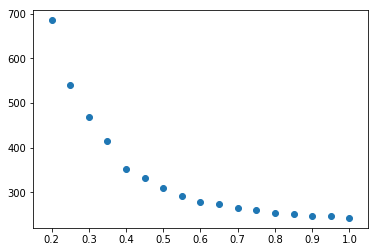

In [5]:
plt.scatter(Q, makespan)

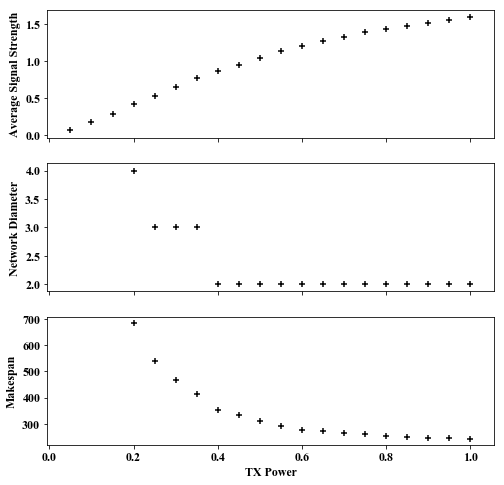

In [15]:
plt.figure(figsize=(8,8))
plt.rc('font', family='Times New Roman', size=12)
plt.rc('scatter', marker='+')

ax1 = plt.subplot(311)
plt.scatter(Q, fSS, c='black')
plt.ylabel('Average Signal Strength')
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(312, sharex=ax1)
plt.scatter(Q, D_N, c='black')
plt.ylabel('Network Diameter')
plt.setp(ax2.get_xticklabels(), visible=False)

ax3 = plt.subplot(313, sharex=ax1)
plt.scatter(Q, makespan, c='black')
plt.ylabel('Makespan')
plt.xlabel('TX Power')
plt.savefig('design-exploration-experiment.svg')